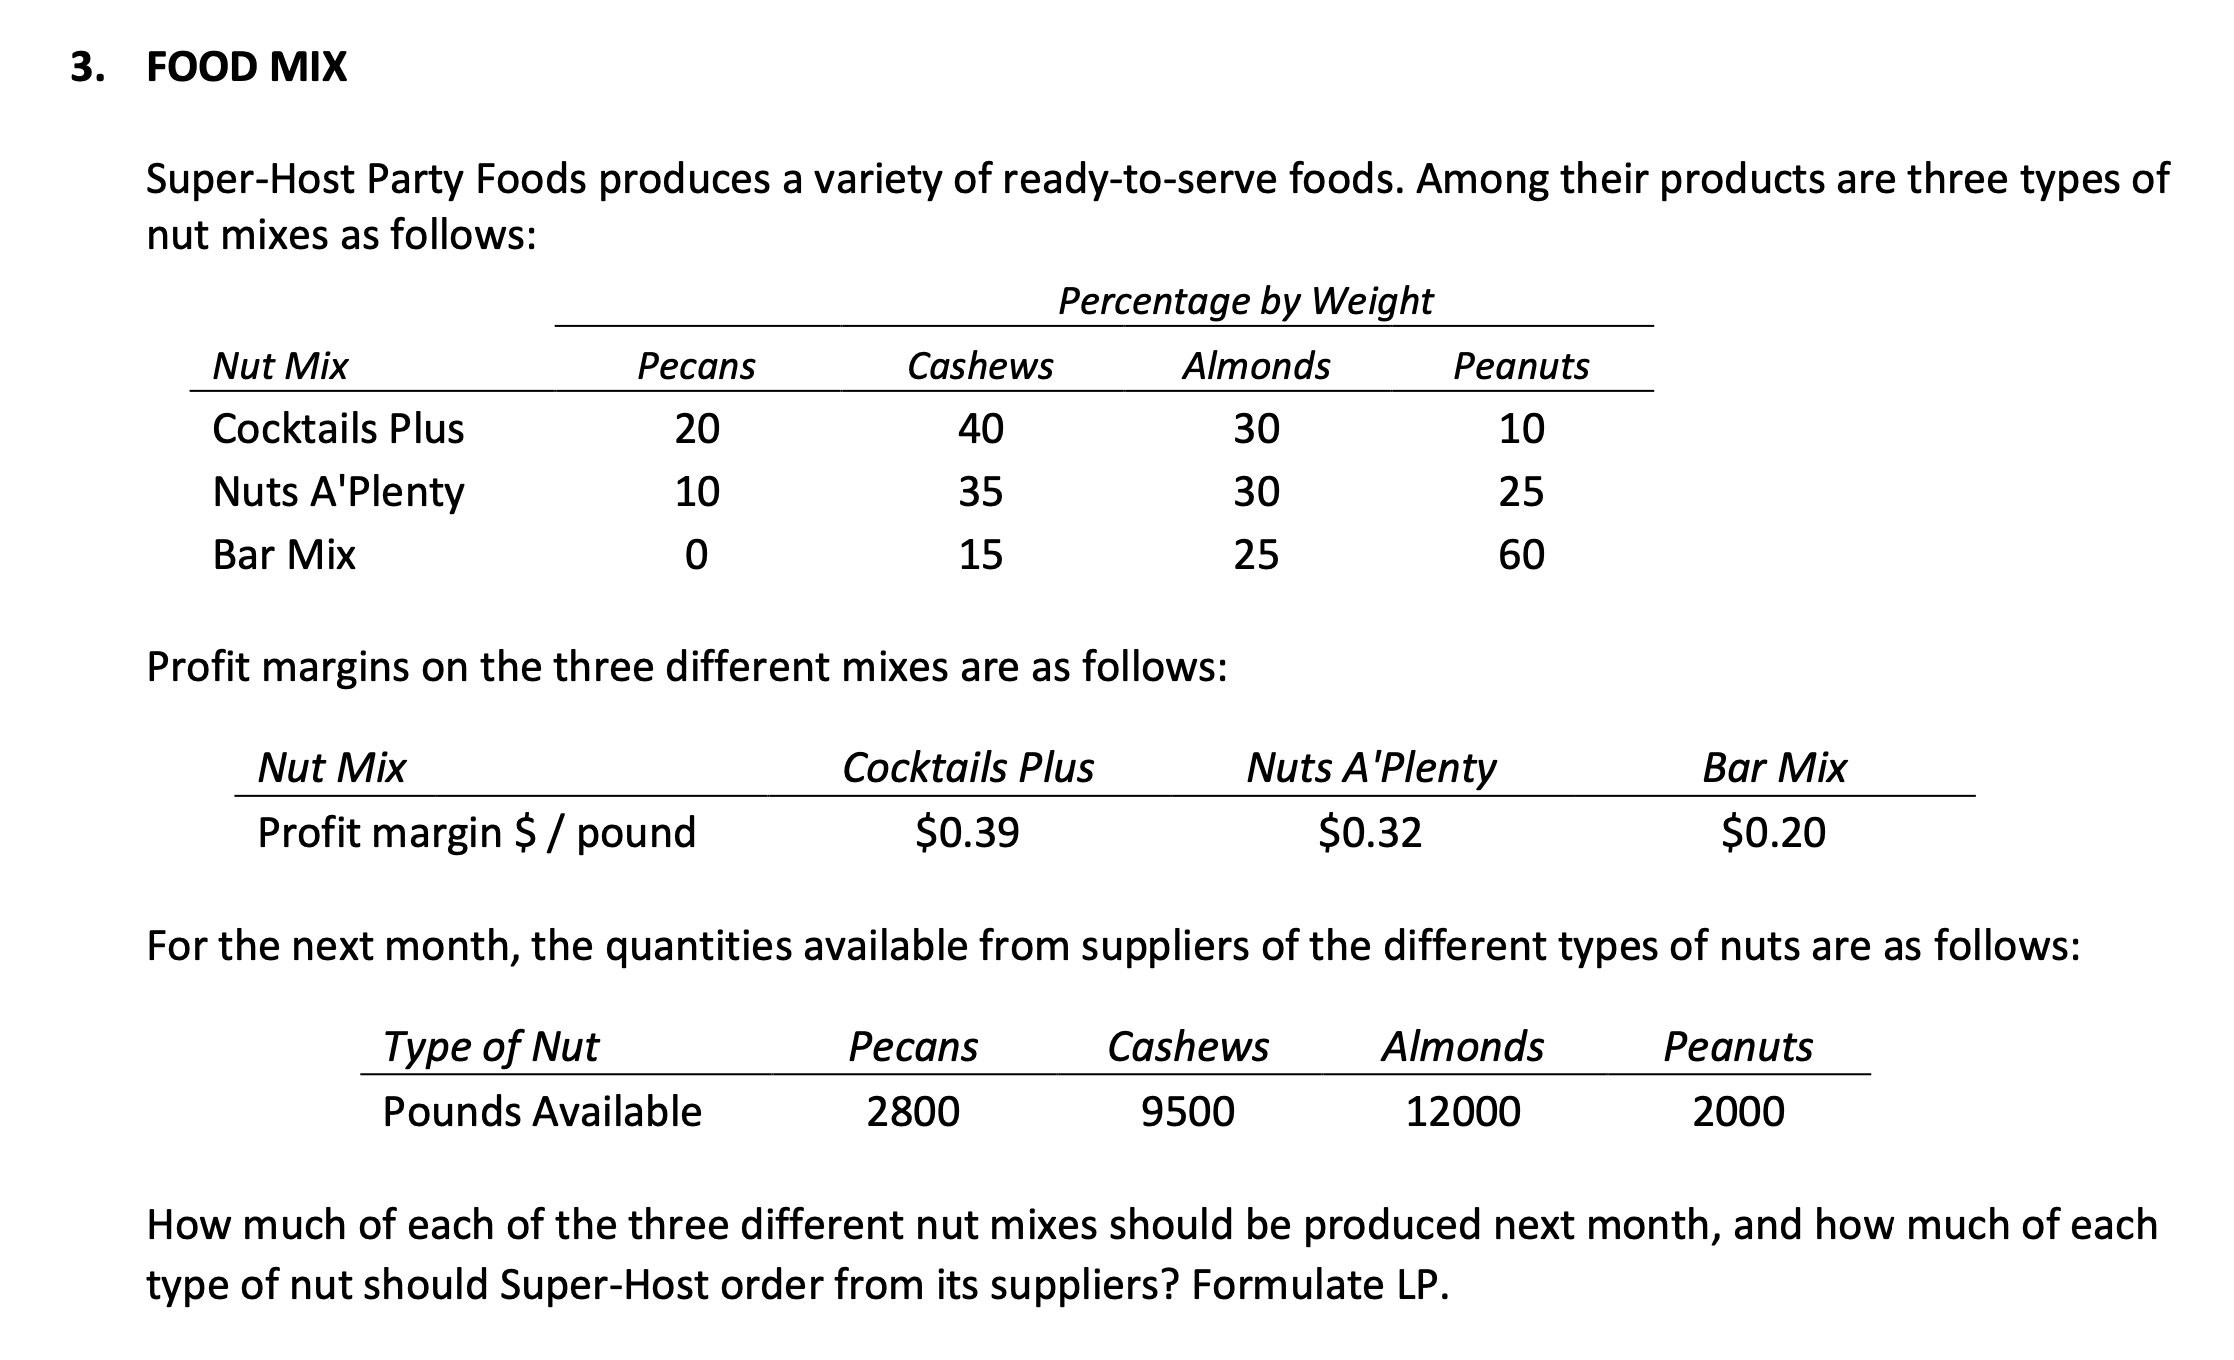

In [68]:
from pulp import *
import pandas as pd

In [119]:
infodf = pd.DataFrame({'Mixes': ['Cocktails Plus', 'Nuts A Plenty', 'Bar Mix'],
                   'Pecans': [.20, .10, 0],
                   'Cashews': [.40, .35, .15],
                   'Almonds': [.30, .30, .25],
                   'Peanuts': [.10, .25, .60]
                    })
# infodf['Profit Margins'] = [0.39, 0.32, 0.20]

availabledf = pd.DataFrame({'Variable': ['Pecans', 'Cashews', 'Almonds', 'Peanuts'],
                   'Pounds Available': [2800, 9500, 12000, 2000],
                    })

print(infodf)
print(availabledf)

            Mixes  Pecans  Cashews  Almonds  Peanuts
0  Cocktails Plus     0.2     0.40     0.30     0.10
1   Nuts A Plenty     0.1     0.35     0.30     0.25
2         Bar Mix     0.0     0.15     0.25     0.60
  Variable  Pounds Available
0   Pecans              2800
1  Cashews              9500
2  Almonds             12000
3  Peanuts              2000


In [159]:
# Initialize the LP
model = LpProblem('Food Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3], lowBound=0, cat='Integer') 

# Objective Function
model += .39 * x[1] + .32 * x[2] + .20 * x[3] # Max Profit

# Add Constraints
model += .20 * x[1] + .1 * x[2] + 0 * x[3] <= 2800
model += .40 * x[1] + .35 * x[2] + .15 * x[3] <= 9500
model += .30 * x[1] + .3 * x[2] + .25 * x[3] <= 12000
model += .10 * x[1] + .25 * x[2] + .60 * x[3] <= 2000

print(model)

# Solve the model
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_return = value(model.objective)
print(f"max return = {max_return}")

Food_Mix:
MAXIMIZE
0.39*x_1 + 0.32*x_2 + 0.2*x_3 + 0.0
SUBJECT TO
_C1: 0.2 x_1 + 0.1 x_2 <= 2800

_C2: 0.4 x_1 + 0.35 x_2 + 0.15 x_3 <= 9500

_C3: 0.3 x_1 + 0.3 x_2 + 0.25 x_3 <= 12000

_C4: 0.1 x_1 + 0.25 x_2 + 0.6 x_3 <= 2000

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_methods/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/cae8a246fc874221ac562ff541defa5d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/cae8a246fc874221ac562ff541defa5d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 30 RHS
At line 35 BOUNDS
At line 39 ENDATA
Problem MODEL has 4 rows, 3 columns and 11 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from c

/Users/jason/Documents/GitHub/naut/quantitative_methods/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [154]:
# Store variable solutions into a list
solutions = []
for var in model.variables():
    solutions.append(var.varValue)

In [157]:
# Create new df
qtydf = pd.DataFrame({'Mixes': ['Cocktails Plus', 'Nuts A Plenty', 'Bar Mix']})

# Add new columns with quantities calculated from data from solver
qtydf['Pecans_qty'] = infodf['Pecans'] * solutions
qtydf['Cashews_qty'] = infodf['Cashews'] * solutions
qtydf['Almonds_qty'] = infodf['Almonds'] * solutions
qtydf['Peanuts qty'] = infodf['Peanuts'] * solutions

# Add a Totals row
qtydf.loc[len(infodf)]= qtydf.sum()
qtydf.loc[qtydf.index[-1], 'Mixes'] = 'Total'

print(qtydf)

            Mixes  Pecans_qty  Cashews_qty  Almonds_qty  Peanuts qty
0  Cocktails Plus      2500.0       5000.0       3750.0       1250.0
1   Nuts A Plenty       300.0       1050.0        900.0        750.0
2         Bar Mix         0.0          0.0          0.0          0.0
3           Total      2800.0       6050.0       4650.0       2000.0
